In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy.stats import binom

In [2]:
rcParams_dict = {
    'xtick.bottom': True,
    'patch.edgecolor':'k',
    'patch.force_edgecolor': True,
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'cm',
}
mpl.rcParams.update(rcParams_dict)

In [3]:
def F(p,x):
    return (p*x)/(1+p*(x-1))

def get_f(N,w,x):
    def f(i):
        return F(i/N,w*np.exp(-x))
    return f

In [4]:
def get_curve(N,p0,w):
    S_list = []
    for x in np.linspace(-1,1,100):
        f = get_f(N,w,x)
        S = binom.expect(f,args=(N,F(p0,w*np.exp(x))))
        S_list.append(S)
    
    x = 0
    f = get_f(N,w,x)
    S_0 = binom.expect(f,args=(N,F(p0,w*np.exp(x))))
    return np.array(S_list) - S_0

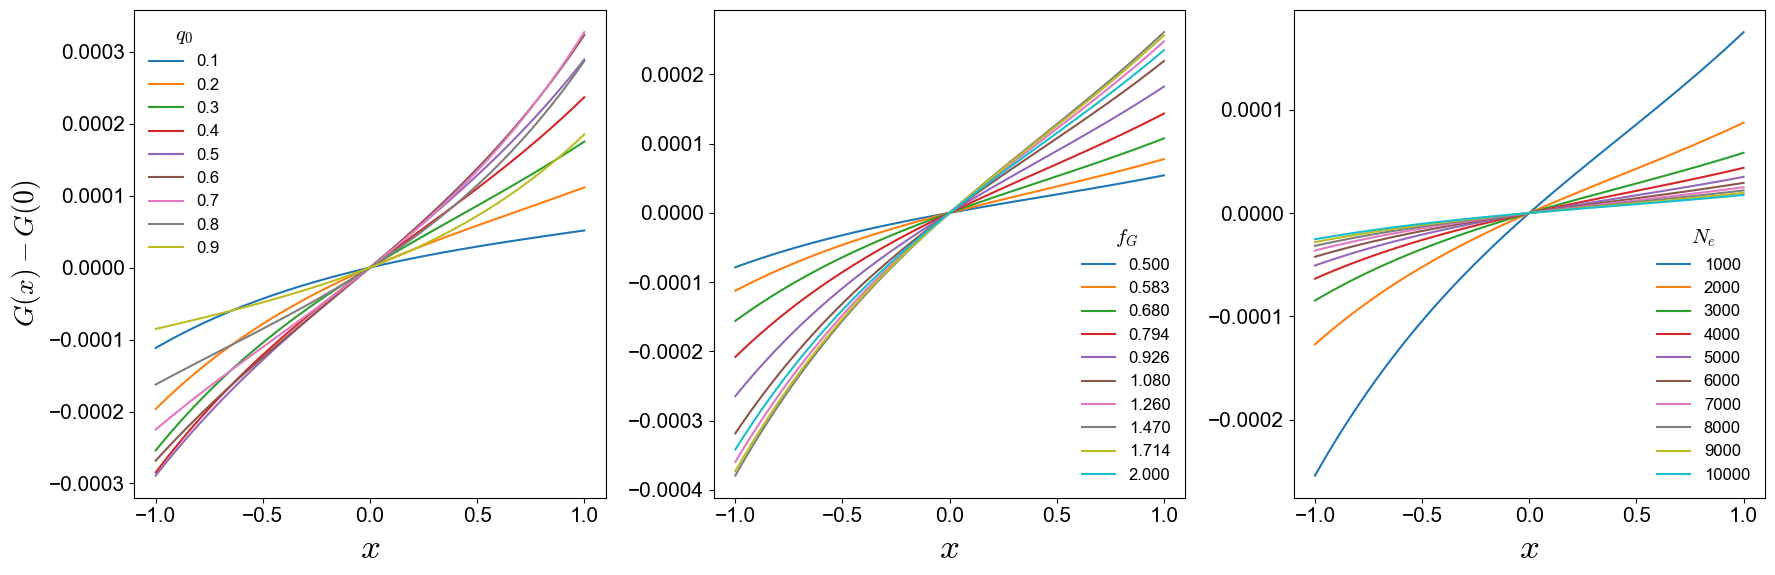

In [5]:
# Effective populaiton size (Ne)
N_list = np.linspace(1000,10000,10)

# Initial frequency (p0)
p0_list = np.linspace(0.1,0.9, 9)

# Geometric mean fitness (w)
w_list = 2**(np.linspace(-1,1,10))

fig, axes = plt.subplots(1,3,figsize=[18,6])

# Fix effective populaiton size (Ne) and relative fitness (w), vary initial frequency (p0)
N = 1000
w = 0.9
for p0 in p0_list:
    S_list = get_curve(N,p0,w)
    axes[0].plot(np.linspace(-1,1,100),S_list,label=f'{p0:.1f}')
axes[0].legend(frameon=False,title="$\mathit{q}_0$",fontsize=12)
axes[0].set_xlabel('$x$',fontsize=25)

# Fix effective populaiton size (Ne) and initial frequency (p0), vary relative fitness (w)
N = 1000
p0 = 0.3
for w in w_list:
    S_list = get_curve(N,p0,w)
    axes[1].plot(np.linspace(-1,1,100),S_list,label=f'{w:.3f}')
axes[1].legend(frameon=False, title="$\mathit{f}_G$",fontsize=12)
axes[1].set_xlabel('$x$',fontsize=25)

# Fix initial frequency (p0) and relative fitness (w), vary effective populaiton size (Ne).
p0=0.3
w = 0.9
for N in N_list:
    S_list = get_curve(N,p0,w)
    axes[2].plot(np.linspace(-1,1,100),S_list,label=f'{N:n}')
axes[2].legend(frameon=False, title="$\mathit{N}_e$",fontsize=12)
axes[2].set_xlabel('$x$',fontsize=25)

axes[0].set_ylabel('$G(x)-G(0)$',fontsize=20)
plt.tight_layout()
#plt.savefig('FigureS1.pdf')